In [1]:
import numpy as np
import tensorflow as tf
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

import data_load
import data_process
import train_model

2023-08-26 17:56:22.473198: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 17:56:23.437643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from sklearn import preprocessing

DATA_PATH = "data/Turbine_Data_Penmanshiel_11_2021-01-01_-_2021-07-01_1051.csv"
LOGS_PATH = "data/Status_Penmanshiel_11_2021-01-01_-_2021-07-01_1051.csv"

data = data_load.load_turbine_data_without_time(DATA_PATH)
logs = data_load.load_turbine_logs_with_endtime(LOGS_PATH)
labels = data_load.get_data_label(data_load.load_turbine_data(DATA_PATH), logs)
scaler = preprocessing.StandardScaler()
data_imputer = KNNImputer(n_neighbors=10)
data = data_process.impute_data(data)
data = data_process.standardize_data(data, scaler=scaler)
print(data.shape)
data = np.array(data, dtype='float32')

(26064, 299)


In [3]:
from sklearn.model_selection import train_test_split

epochs = 3000
k = 10

i = 0
inner_size = 20
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1)
    # ae_model = model.RnnAutoEncoder(input_size=np.size(data, axis=1)).to(device)
    # loss = nn.MSELoss()
ae_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(np.size(data, axis=1),)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(inner_size, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(np.size(data, axis=1))
])
X_train = X_train[y_train == 0]
# optimizer = torch.optim.Adam(ae_model.parameters(), lr=0.001)

ae_model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])

# X_train, X_test = data[train_index], data[test_index]

ae_model.fit(X_train, X_train, epochs=epochs, batch_size=np.size(data, axis=0))

# test_loss, res = ae_model.evaluate(X_test, X_test, batch_size=np.size(data, axis=0))
X_pred = ae_model(X_test)
res = np.sum(np.power(X_pred - X_test, 2), axis=1)

    # res = train_model.autoencoder_test(X_test, X_test, ae_model, 1000)
    # break

2023-08-26 17:56:51.711198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 17:56:51.750551: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 17:56:51.751223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 17:56:51.753147: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 17:56:51.753566: I tensorflow/compile

Epoch 1/3000


2023-08-26 17:56:54.996469: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x36b26060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-26 17:56:54.996605: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-08-26 17:56:55.015595: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-26 17:56:55.310769: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8900
2023-08-26 17:56:55.402423: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-26 17:56:55.493593: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 4s 4s/step - loss: 0.7734 - mean_squared_error: 0.7734
Epoch 2/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.7683 - mean_squared_error: 0.7683
Epoch 3/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.7645 - mean_squared_error: 0.7645
Epoch 4/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.7597 - mean_squared_error: 0.7597
Epoch 5/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.7527 - mean_squared_error: 0.7527
Epoch 6/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.7426 - mean_squared_error: 0.7426
Epoch 7/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.7291 - mean_squared_error: 0.7291
Epoch 8/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.7121 - mean_squared_error: 0.7121
Epoch 9/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.6918 - mean_squared_error: 0.6918
Epoch 10/3000
1/1 [===============

0.97408988957902


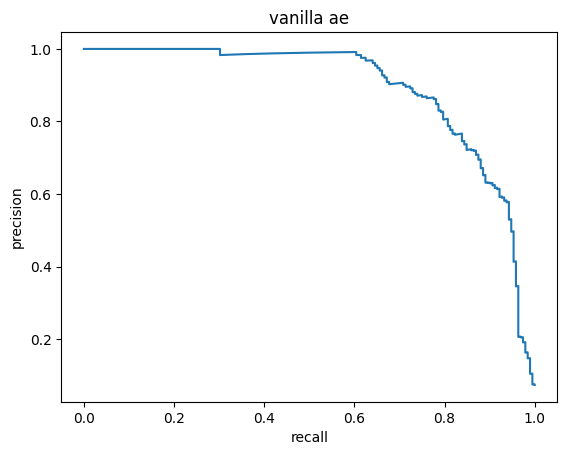

In [4]:
import sklearn.metrics as metrics

res_sorted = np.sort(res)
res_cdf = 1. * np.arange(len(res)) / (len(res) - 1)
point_color = ["red" if label == 1 else "blue" for label in y_test]
point_size = [0.1 if label == 0 else 10 for label in y_test]
# plt.hist(res, bins=200)
# plt.scatter(res, range(res.size), s=point_size, c=point_color)

fpr, tpr, _ = metrics.roc_curve(y_test, res)

precision, recall, threshold = metrics.precision_recall_curve(y_test, res)

# precision = precision[0:-3]
#
# recall = recall[0:-3]

plt.plot(recall, precision)

# print(precision, recall)

print(metrics.auc(fpr, tpr))
# print(metrics.auc(precision, recall))

# print(metrics.f1_score(test_labels, res))

# plt.scatter(res_sorted, range(res.size), s=point_size, c=point_color)
# plt.xlim(0, 150)
plt.ylabel("precision")
plt.xlabel("recall")
plt.title("vanilla ae")
plt.show()

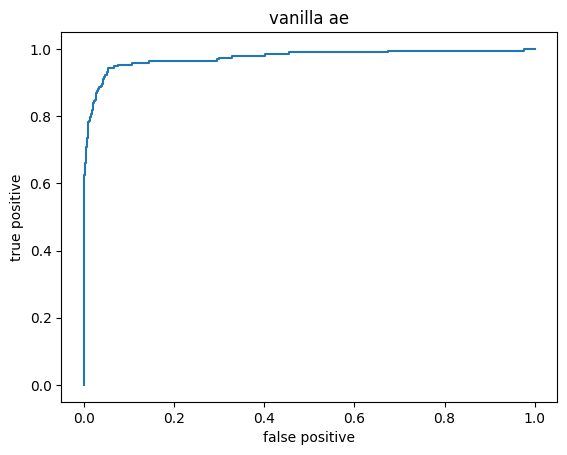

In [5]:
plt.plot(fpr, tpr)
plt.xlabel("false positive")
plt.ylabel("true positive")
plt.title("vanilla ae")
plt.show()